In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np
from os import listdir
from os.path import isfile, join

image_files = ['/content/drive/My Drive/yalefaces_ml/' + f for f in listdir('/content/drive/My Drive/yalefaces_ml')]
total_no_images = len(image_files)
print("Total number of images : ",total_no_images)

Total number of images :  165


In [0]:
# Function to load the images
from PIL import Image

def load_image(infilename) :
    img = Image.open( infilename )
    img = img.resize((120,120))
    data = np.array(img, dtype ='float')
    data = data.flatten()
    return data



In [0]:
# input
X = np.empty((total_no_images,14400))

In [0]:
#  normalize the data
from sklearn.preprocessing import scale
i = 0

for image in image_files:
    data = load_image(image)
    X[i:] = scale(data)
    i = i + 1

In [6]:
X.shape

(165, 14400)

In [7]:
X

array([[0.49428811, 0.87158227, 0.92398424, ..., 0.78773913, 0.79821952,
        0.35804299],
       [0.74553227, 0.74553227, 0.74553227, ..., 0.74553227, 0.74553227,
        0.74553227],
       [0.68639664, 0.68639664, 0.68639664, ..., 0.68639664, 0.68639664,
        0.68639664],
       ...,
       [0.69592428, 0.69592428, 0.69592428, ..., 0.69592428, 0.69592428,
        0.53496968],
       [0.80523897, 0.80523897, 0.80523897, ..., 0.80523897, 0.80523897,
        0.80523897],
       [0.7173607 , 0.7173607 , 0.7173607 , ..., 0.7173607 , 0.7173607 ,
        0.7173607 ]])

In [8]:
# Keep the mean to use later
x0 = np.mean(X, axis=0)
print(x0.shape)

(14400,)


In [0]:
X_orig = X.copy()
# Covariance matrix
S = np.cov(X.T)

In [10]:
print('Shape of the covariance matrix is ', S.shape)

Shape of the covariance matrix is  (14400, 14400)


In [11]:
S

array([[ 0.02961649,  0.02324548,  0.02213133, ..., -0.04181545,
        -0.03895638, -0.03401127],
       [ 0.02324548,  0.02907016,  0.02652417, ..., -0.03144387,
        -0.03004873, -0.03203301],
       [ 0.02213133,  0.02652417,  0.02869489, ..., -0.02732674,
        -0.02621114, -0.02719972],
       ...,
       [-0.04181545, -0.03144387, -0.02732674, ...,  0.37548951,
         0.37690183,  0.37478871],
       [-0.03895638, -0.03004873, -0.02621114, ...,  0.37690183,
         0.41471389,  0.41248425],
       [-0.03401127, -0.03203301, -0.02719972, ...,  0.37478871,
         0.41248425,  0.43434604]])

In [0]:
# Question 2.a Implement Principal Component Analysis (PCA) 
import time
start = time.time()
from numpy import linalg as LA
values, vectors = LA.eig(S)
end = time.time()

In [0]:
pwd

In [0]:
#https://stackoverflow.com/questions/8092920/sort-eigenvalues-and-associated-eigenvectors-after-using-numpy-linalg-eig-in-pyt
#np.save('/content/drive/My Drive/eigenvalues', values)
#np.save('/content/drive/My Drive/eigenvectors', vectors)

values = np.load('/content/drive/My Drive/eigenvalues.npy')

vectors = np.load('/content/drive/My Drive/eigenvectors.npy')

In [13]:
values.shape

(14400,)

In [14]:
vectors.shape

(14400, 14400)

In [0]:
sorted_idx = values.argsort()

In [16]:
sorted_idx

array([156, 155, 163, ...,   2,   1,   0])

In [0]:
sorted_idx = sorted_idx[::-1]

In [18]:
sorted_idx

array([  0,   1,   2, ..., 163, 155, 156])

sum of all the eigenvalues is :  (6883.292283357105-2.938506871948269e-29j)
[(33.73+0j), (45.42+0j), (54.06+0j), (59.56+0j), (63.74+0j), (67.31+0j), (70.52+0j), (73.18+0j), (75.08+0j), (76.64+0j), (78.12+0j), (79.43+0j), (80.48+0j), (81.47+0j), (82.43+0j), (83.25+0j), (84.04+0j), (84.77+0j), (85.48+0j), (86.09+0j), (86.64+0j), (87.17+0j), (87.66+0j), (88.11+0j), (88.54+0j), (88.93+0j), (89.3+0j), (89.64+0j), (89.97+0j), (90.29+0j), (90.6+0j), (90.91+0j), (91.18+0j), (91.45+0j), (91.7+0j), (91.94+0j), (92.16+0j), (92.37+0j), (92.57+0j), (92.76+0j), (92.96+0j), (93.14+0j), (93.32+0j), (93.49+0j), (93.66+0j), (93.82+0j), (93.98+0j), (94.14+0j), (94.29+0j), (94.43+0j)]


/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


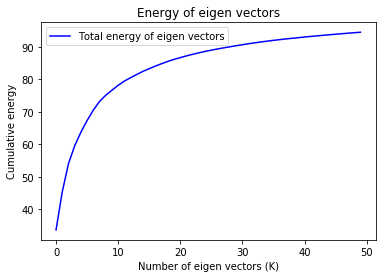

In [19]:
sum_all_values = np.sum(values)
print('sum of all the eigenvalues is : ', sum_all_values)
sum = 0
energies = []
for K in range(50):
    idx = sorted_idx[K]
    sum = sum + values[idx]
    energy = (sum*100)/sum_all_values
    energy = round(energy, 2)
    energies.append(energy)
    
print (energies)

import matplotlib.pyplot as plt

K_Values = range(50)    
plt.plot(K_Values, energies, 'b', label='Total energy of eigen vectors')
plt.title('Energy of eigen vectors')
plt.xlabel('Number of eigen vectors (K)')
plt.ylabel('Cumulative energy')
plt.legend()

plt.show()    
    

[(2321.5613929688184+0j), (804.6496873800984+0j), (594.5740977550016+0j), (378.9400434076328+0j), (287.3896127456431+0j), (245.71402601771157+0j), (221.12068394839451+0j), (183.33478883686942+0j), (130.5264634307286+0j), (107.40994285621112+0j), (101.75046566270586+0j), (90.48239896499516+0j), (71.9894343963276+0j), (68.59072949923234+0j), (65.61131537462441+0j), (56.87025945295701+0j), (54.04756717423103+0j), (50.401116066498204+0j), (48.68669451687862+0j), (41.85343376700608+0j), (37.95778093541738+0j), (36.881953454263254+0j), (33.65404085874752+0j), (30.822617678653362+0j), (29.308873905177524+0j), (26.963711081171937+0j), (25.501483470489042+0j), (23.338391978465097+0j), (22.843510078394093+0j), (22.32028190005816+0j), (21.32571748917328+0j), (20.856114328563564+0j), (18.942744495797978+0j), (18.531283531961176+0j), (17.21004287266184+0j), (16.331120266168345+0j), (15.033340512344296+0j), (14.520048497091897+0j), (13.772824225758974+0j), (13.644963928830666+0j), (13.36624001408110

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


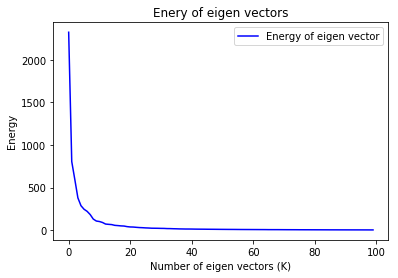

In [20]:
absolute_energy = []

for K in range(100):
    idx = sorted_idx[K]
    absolute_energy.append(values[idx])

print (absolute_energy)

K_Values = range(100)    
plt.plot(K_Values, absolute_energy, 'b', label='Energy of eigen vector')
plt.title('Enery of eigen vectors')
plt.xlabel('Number of eigen vectors (K)')
plt.ylabel('Energy')
plt.legend()

plt.show() 
    

In [0]:
# Plot the top 10 eigenfaces, i.e. the eigenvectors uk, k = 1,..., 10 obtained by PCA.

top_100 = np.empty((14400, 100))

for K in range(100):
    idx = sorted_idx[K]
    eigenVector = vectors[:,idx]
    top_100[:,K] = np.real(eigenVector)



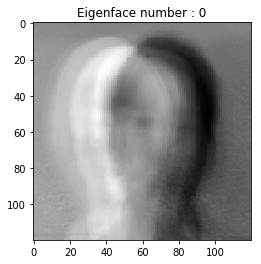

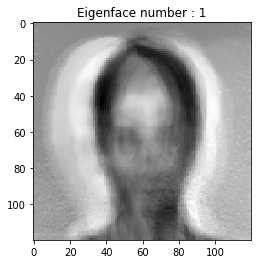

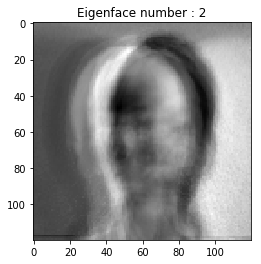

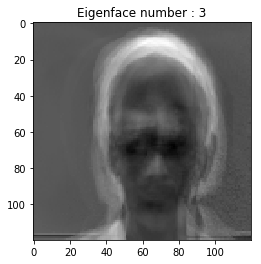

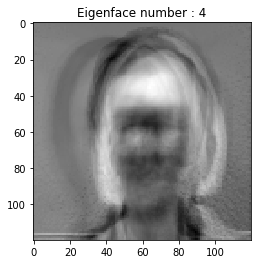

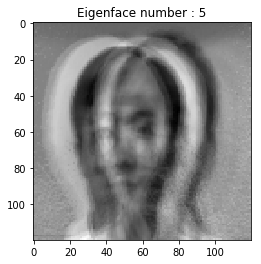

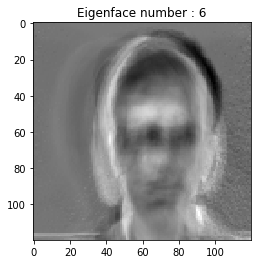

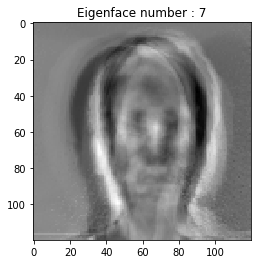

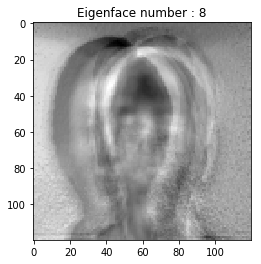

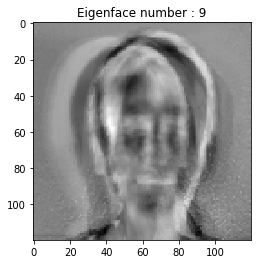

In [24]:
# https://matplotlib.org/users/image_tutorial.html
for vec_num in range(10):
    img = top_100[:,vec_num]
    imgplot = plt.imshow(img.reshape(120,120))
    imgplot.set_cmap('gray')
    plt.title('Eigenface number : %d'% vec_num)
    plt.show()
    
    

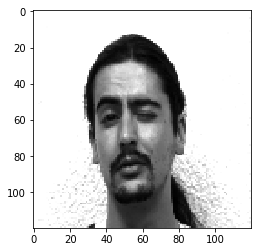

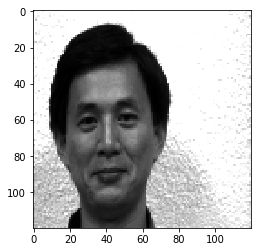

In [55]:
# real image

images_real = [load_image(image_files[7]), load_image(image_files[15])] 
for real_image in images_real:
    imgplot = plt.imshow(real_image.reshape(120,120))
    imgplot.set_cmap('gray')
    plt.show()



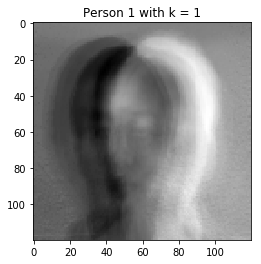

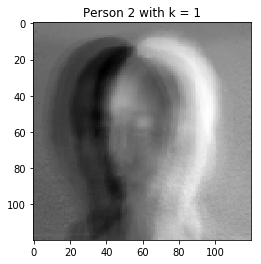

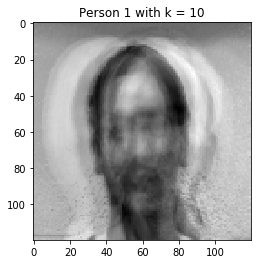

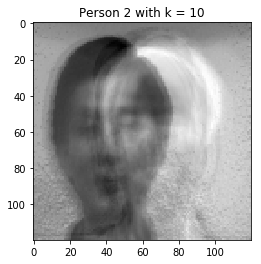

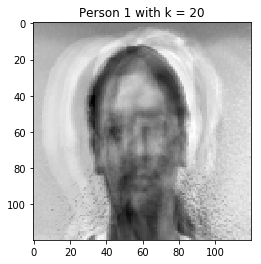

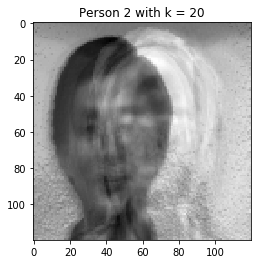

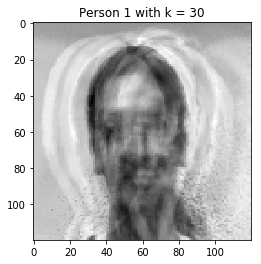

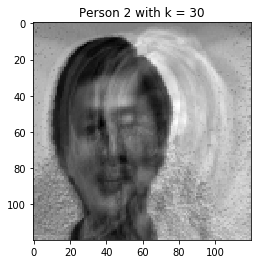

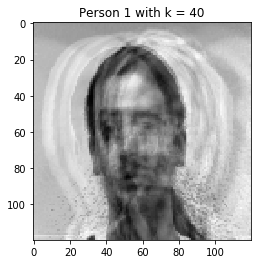

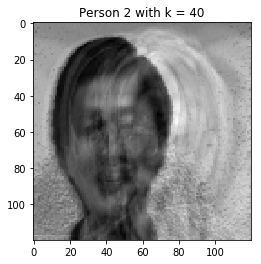

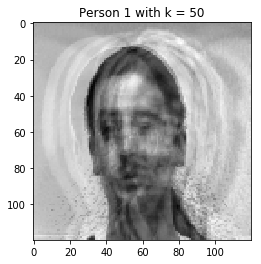

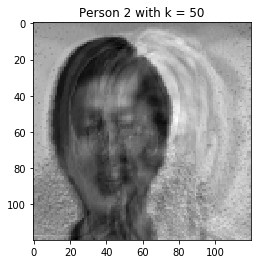

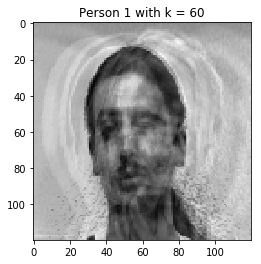

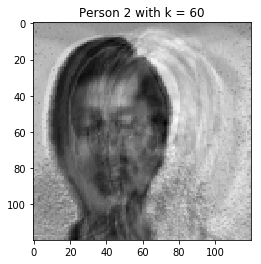

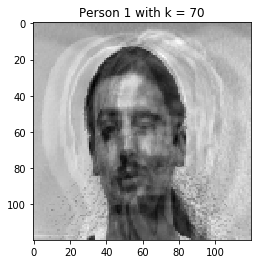

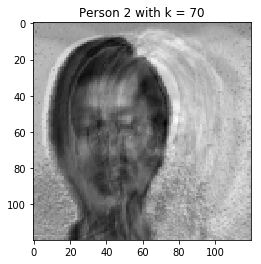

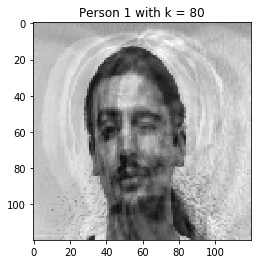

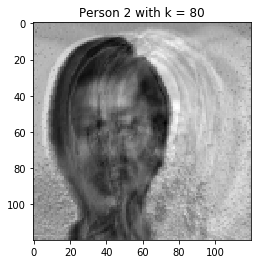

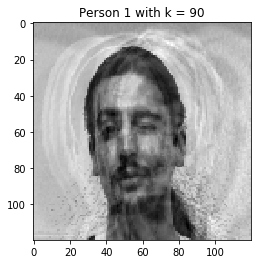

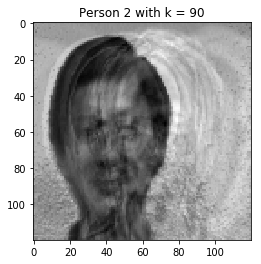

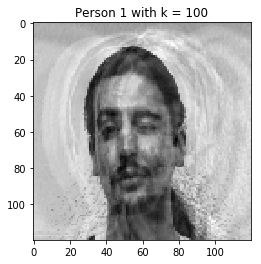

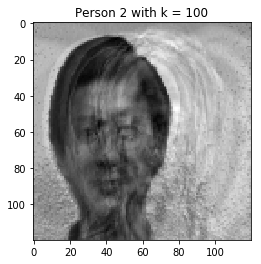

In [56]:
components = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for k in components:
    p = 1
    for real_image in images_real:
        add = np.zeros((14400,))
        for i in range(k):
            u = top_100[:,i]
            # real_image = scale(real_image)
            add = add + np.dot(u.T, real_image) * u
        
        image = x0 + add
        imgplot = plt.imshow(image.reshape(120,120))
        imgplot.set_cmap('gray')
        plt.title('Person %d with k = %d' % (p, k))
        plt.show()
        p = p + 1

In [0]:
import re
label_list = []

for file_name in image_files:
    x = re.split("subject", file_name)
    x = re.split("\.", x[1])
    label_list.append(x[0])

#label_list = list(dict.fromkeys(label_list))

In [0]:
y = np.array(label_list, dtype=int)
y = y - 1

In [59]:
y.shape

(165,)

In [0]:
X = X_orig.copy()

In [73]:
from sklearn.model_selection import train_test_split
print('X shape is ', X.shape)
print('y shape is ', y.shape)
print(X[0])
#https://stackoverflow.com/questions/31521170/scikit-learn-train-test-split-with-indices
index_col = np.arange(X.shape[0])
X = np.insert(X, 0, index_col, axis=1)
print(X[0])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=87)

print('X_train shape is ', X_train.shape)
print('y_train shape is ', y_train.shape)
print('X_test shape is ', X_test.shape)
print('y_test shape is ', y_test.shape)
print(X_train[0])
print(X_test[0])
print(y_train[0])
print(y_test[0])

X shape is  (165, 14400)
y shape is  (165,)
[0.49428811 0.87158227 0.92398424 ... 0.78773913 0.79821952 0.35804299]
[0.         0.49428811 0.87158227 ... 0.78773913 0.79821952 0.35804299]
X_train shape is  (132, 14401)
y_train shape is  (132,)
X_test shape is  (33, 14401)
y_test shape is  (33,)
[146.           0.51143885   0.8886216  ...   0.7808551    0.77007845
   0.31745915]
[39.          1.18635852  1.18635852 ...  0.72375777  0.85592941
  0.4971778 ]
5
6


In [74]:
X_train_samples = X_train[:, 0]
X_test_samples = X_test[:, 0]
print(X_train_samples.shape)
print(X_test_samples.shape)
print(X_train_samples)
print(X_test_samples)
np.save('/content/drive/My Drive/X_train_samples.npy', X_train_samples)
np.save('/content/drive/My Drive/X_train_samples.npy', X_test_samples)

X = np.delete(X, 0, axis=1)
X_train = np.delete(X_train, 0, axis=1)
X_test = np.delete(X_test, 0, axis=1)
print('X shape is ', X.shape)
print('y shape is ', y.shape)
print('X_train shape is ', X_train.shape)
print('y_train shape is ', y_train.shape)
print('X_test shape is ', X_test.shape)
print('y_test shape is ', y_test.shape)
print(X_train[0])
print(X_test[0])
print(y_train[0])
print(y_test[0])

(132,)
(33,)
[146.  79.  24. 143. 153. 155. 157. 140.  98.  36.   8.  90.  28.   9.
  34.  69. 136. 101. 137.  40.  15.  91.  80.  70.  17. 149. 152.  29.
  46. 162.  94.   4. 119.  88. 128. 154.  37. 130. 160.   2.  78.  27.
  92.  12.  74. 110.  56.  82.  64. 116. 112. 159.  72.  53.  21.  14.
 118.  57.  77. 129.  96. 105.  87.  30. 134. 114.  83. 138.  52. 131.
 117.   6.  47.  38. 123.  19.  48.  89.  23. 121.  33. 145.  65. 107.
  60.  43.  41.  49.  35.  13.  32.  81.  86. 147.  93.  18. 124. 135.
   5. 126.  54. 103. 158. 164. 142.   1.  20. 139.  97.  75.  26.  22.
  25.  16. 156.  76. 144.  84. 125.  71. 163. 115. 120.  51.  58.  31.
  45. 100. 104.  67.   7.   3.]
[ 39. 150.  59. 108.  85.  62. 111. 161.  99. 113.  73. 106.  63.  68.
  11.  66. 151. 102. 141.  50.   0.  95.  55. 148. 109. 127.  10.  42.
  61. 133.  44. 132. 122.]
X shape is  (165, 14400)
y shape is  (165,)
X_train shape is  (132, 14400)
y_train shape is  (132,)
X_test shape is  (33, 14400)
y_test shape is  (

In [75]:
print(X[0])

[0.49428811 0.87158227 0.92398424 ... 0.78773913 0.79821952 0.35804299]


In [76]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [77]:
np.unique(y_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [78]:
"""
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)
"""
X_train[0]

array([0.51143885, 0.8886216 , 0.92095155, ..., 0.7808551 , 0.77007845,
       0.31745915])

In [79]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.preprocessing import StandardScaler

components = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

accuracy = []


skf = StratifiedKFold(n_splits=5, random_state=12)

for k in components:
    all_scores = []
    for train_index, test_index in skf.split(X_train, y_train):
        train_data, test_data = X_train[train_index], X_train[test_index]
        train_target, test_target = y_train[train_index], y_train[test_index]
        U = top_100[:,0:k]
        train_data = np.matmul(train_data, U)
        test_data = np.matmul(test_data, U)
        
        # Standardization
        sc_x = StandardScaler()
        train_data = sc_x.fit_transform(train_data)
        test_data = sc_x.transform(test_data)

        svm_classifier = svm.SVC(kernel='linear', C=1.0, gamma='scale')
        svm_classifier.fit(train_data, train_target)
        y_pred = svm_classifier.predict(test_data)
        score = accuracy_score(test_target, y_pred) * 100
        all_scores.append(score)
    mean = np.mean(all_scores)    
    accuracy.append(mean)
    print('For k = %d the CV accuracy is %f'%(k, mean))
    
        

For k = 1 the CV accuracy is 20.370370
For k = 10 the CV accuracy is 83.407407
For k = 20 the CV accuracy is 88.444444
For k = 30 the CV accuracy is 90.444444
For k = 40 the CV accuracy is 93.777778
For k = 50 the CV accuracy is 91.703704
For k = 60 the CV accuracy is 90.370370
For k = 70 the CV accuracy is 87.703704
For k = 80 the CV accuracy is 81.481481
For k = 90 the CV accuracy is 76.814815
For k = 100 the CV accuracy is 68.592593


In [80]:
import operator
index, value = max(enumerate(accuracy), key=operator.itemgetter(1))
print(value)
print(components[index])
print('Best K is {} | Accuracy is {} '.format(components[index], value))

93.77777777777777
40
Best K is 40 | Accuracy is 93.77777777777777 


In [0]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

In [0]:
U = top_100[:,0:40]
X_train = np.matmul(X_train, U)
X_test = np.matmul(X_test, U)

# Standardization
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

svm_classifier = svm.SVC(kernel='linear', C=1.0, gamma='scale')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
score = accuracy_score(y_test, y_pred) * 100

In [83]:
print('Test accuracy is ', score)

Test accuracy is  96.96969696969697


In [0]:
# Restore the values again

X_train = X_train_copy.copy()
X_test = X_test_copy.copy()


In [85]:
# Using CNN to classify
print(X_train[0])
print(X_test[0])
print(y_train[0])
print(y_test[0])

[0.51143885 0.8886216  0.92095155 ... 0.7808551  0.77007845 0.31745915]
[1.18635852 1.18635852 1.18635852 ... 0.72375777 0.85592941 0.4971778 ]
5
6


In [86]:
"""
image_files
def load_image(infilename) :
    img = Image.open( infilename )
    img = img.resize((120,120))
    data = np.array(img, dtype ='float')
    data = data.flatten()
    return data
"""
from skimage.io import imread

print('Saved Train sample size ', X_train_samples.shape)
print('Saved Test sample size ',X_test_samples.shape)

X_train_CNN = np.empty((X_train_samples.shape[0], 243, 320))
i = 0
for train_file in X_train_samples:
    #img = Image.open(image_files[int(train_file)])
    X_train_CNN[i, :, :] = (np.array(imread(image_files[int(train_file)]))) * 1.0/255
    i = i + 1
    
print('CNN training input shape ', X_train_CNN.shape)
print('CNN training output shape ', y_train.shape)

X_test_CNN = np.empty((X_test_samples.shape[0], 243, 320))
i = 0
for test_file in X_test_samples:
    #img = Image.open(image_files[int(train_file)])
    X_test_CNN[i, :, :] = (np.array(imread(image_files[int(test_file)]))) * 1.0/255
    i = i + 1

print('CNN test input shape ', X_test_CNN.shape)
print('CNN test output shape ', y_test.shape)
    

Saved Train sample size  (132,)
Saved Test sample size  (33,)
CNN training input shape  (132, 243, 320)
CNN training output shape  (132,)
CNN test input shape  (33, 243, 320)
CNN test output shape  (33,)


In [0]:
#y_train = y_train_orig.copy()
#y_test = y_test_orig.copy()

In [0]:
y_train_orig = y_train.copy()
y_test_orig = y_test.copy()

In [89]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('CNN training output shape ', y_train.shape)
print('CNN test output shape ', y_test.shape)

CNN training output shape  (132, 15)
CNN test output shape  (33, 15)


In [0]:
X_train_CNN = X_train_CNN.reshape(X_train_CNN.shape[0], 243, 320, 1)
X_test_CNN = X_test_CNN.reshape(X_test_CNN.shape[0], 243, 320, 1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 241, 318, 256)     2560      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 120, 159, 256)     0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 120, 159, 256)     0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 118, 157, 128)     295040    
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 59, 78, 128)       0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 59, 78, 128)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 57, 76, 64)        73792     
__________

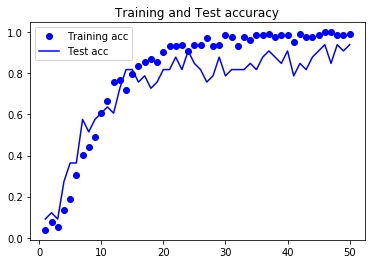

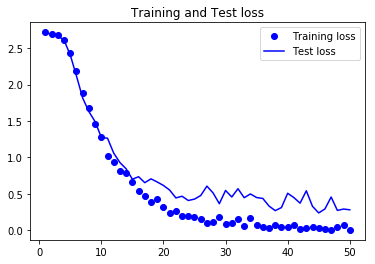

In [91]:
# Defining the Neural Network Architecture
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(256, (3, 3), activation='relu',
                        input_shape=(243, 320, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate = 0.1))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate = 0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate = 0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(rate = 0.1))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(rate = 0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(15, activation='softmax'))

model.summary()

# Compile the model, configure the optimizer
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training Phase. Record the accuracy and error/loss for tuning later on
history = model.fit(X_train_CNN, y_train, epochs=50, batch_size=8, validation_data=(X_test_CNN, y_test))
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Test acc')
plt.title('Training and Test accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Test loss')
plt.title('Training and Test loss')
plt.legend()

plt.show() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 241, 318, 64)      640       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 120, 159, 64)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 118, 157, 128)     73856     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 59, 78, 128)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 57, 76, 128)       147584    
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 28, 38, 128)       0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 28, 38, 128)       0         
__________

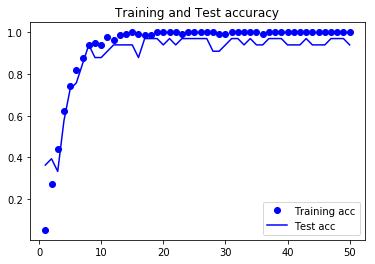

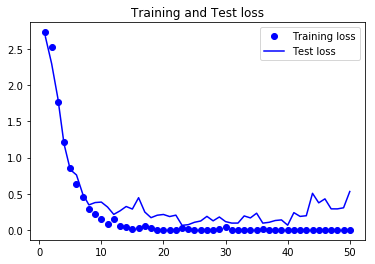

In [92]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(243, 320, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate = 0.25))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(rate = 0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(15, activation='softmax'))

# Compile the model, configure the optimizer
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()          
# Training Phase. Record the accuracy and error/loss for tuning later on

history = model.fit(X_train_CNN, y_train, epochs=50, batch_size=8, validation_data=(X_test_CNN, y_test))
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Test acc')
plt.title('Training and Test accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Test loss')
plt.title('Training and Test loss')
plt.legend()

plt.show()          

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 241, 318, 32)      320       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 120, 159, 32)      0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 118, 157, 64)      18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 59, 78, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 57, 76, 128)       73856     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 28, 38, 128)       0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 28, 38, 128)       0         
__________

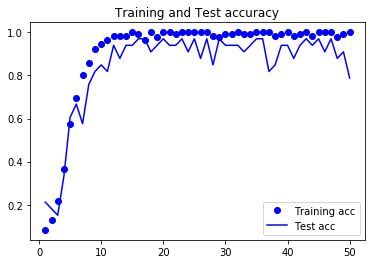

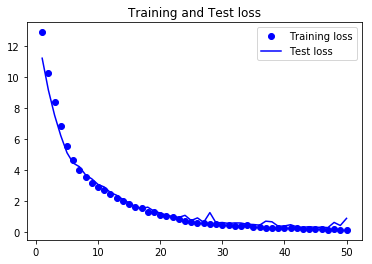

In [93]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(243, 320, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.1))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(15, activation='softmax'))

model.summary() 
# Compile the model, configure the optimizer
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training Phase. Record the accuracy and error/loss for tuning later on
history = model.fit(X_train_CNN, y_train, epochs=50, batch_size=8, validation_data=(X_test_CNN, y_test))

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Test acc')
plt.title('Training and Test accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Test loss')
plt.title('Training and Test loss')
plt.legend()

plt.show() 

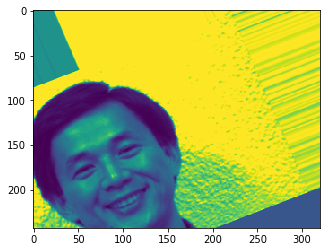

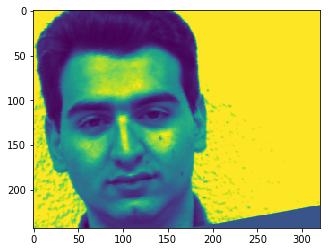

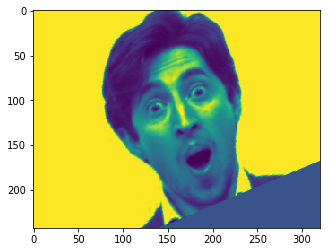

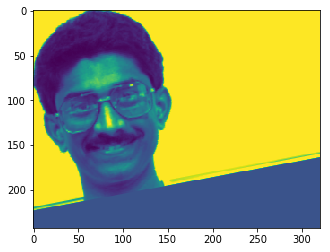

In [94]:
# Question 2.g
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train_CNN)

# Displaying some randomly augmented training images
from keras.preprocessing import image
i = 0
for batch in datagen.flow(X_train_CNN, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 241, 318, 32)      320       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 120, 159, 32)      0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 118, 157, 64)      18496     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 59, 78, 64)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 57, 76, 128)       73856     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 28, 38, 128)       0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 28, 38, 128)       0         
__________

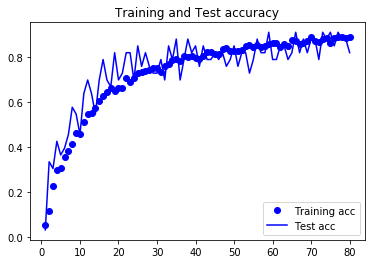

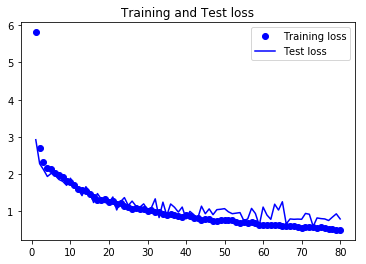

In [95]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(243, 320, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.1))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(15, activation='softmax'))

model.summary()
# Compile the model, configure the optimizer
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training Phase. Record the accuracy and error/loss for tuning later on
history = model.fit_generator(datagen.flow(X_train_CNN, y_train, batch_size=8), steps_per_epoch = 132, epochs=80, validation_data=(X_test_CNN, y_test))

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Test acc')
plt.title('Training and Test accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Test loss')
plt.title('Training and Test loss')
plt.legend()

plt.show() 